In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Import dataset, clean and OneHot Encoding

In [2]:
df_raw = pd.read_excel('danish crown\Danish Crown dataset - 10.31 version.xlsx')

In [3]:
df_raw

,id,gender,QUOTAGERANGE,KIDS02,HHCMP10,AgexGender_Recode,KIDS_IN_HH_1,KIDS_IN_HH_2,MOMENT_LOOP_1_FREQ_cat,MOMENT_LOOP_1_Q23,...,functional_component_8,functional_component_9,functional_component_10,minset_component_1,minset_component_2,minset_component_3,minset_component_4,minset_component_5,minset_component_6,category
0,1,2,3,2,4,8,1,0,3,4,...,-0.81005,-1.18872,-0.69111,1.14086,1.25328,-1.25037,-0.44978,-0.58140,-0.12786,5
1,1,2,3,2,4,8,1,0,3,5,...,-0.06323,-0.19183,-0.10633,1.14086,1.25328,-1.25037,-0.44978,-0.58140,-0.12786,8
2,1,2,3,2,4,8,1,0,4,4,...,-0.47111,-0.19735,1.19978,1.14086,1.25328,-1.25037,-0.44978,-0.58140,-0.12786,9
3,2,2,5,0,3,10,0,1,3,4,...,-0.32140,-0.14266,1.85445,-0.54006,0.77677,0.21557,0.18005,-0.78268,-0.04105,1
4,2,2,5,0,3,10,0,1,3,4,...,-0.55006,-0.32955,1.02560,-0.54006,0.77677,0.21557,0.18005,-0.78268,-0.04105,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,15874,1,3,2,4,3,1,0,1,1,...,0.32362,-1.13410,0.21187,-1.15823,-0.52087,0.36497,-0.51893,2.11774,-0.05467,6
39157,15874,1,3,2,4,3,1,0,2,2,...,0.05774,-0.19060,-1.05633,-1.15823,-0.52087,0.36497,-0.51893,2.11774,-0.05467,8
39158,15875,1,3,2,4,3,1,0,1,1,...,0.17384,0.18910,1.04672,0.61083,-0.88187,-1.21421,0.19331,-0.02024,0.24223,2
39159,15876,2,3,0,1,8,0,1,4,4,...,-0.60906,0.48566,-0.32149,0.21962,-0.68064,0.77685,-1.61152,-0.19236,-0.39692,1


In [4]:
df_raw.dtypes

id                           int64
gender                       int64
QUOTAGERANGE                 int64
KIDS02                       int64
HHCMP10                      int64
AgexGender_Recode            int64
KIDS_IN_HH_1                 int64
KIDS_IN_HH_2                 int64
MOMENT_LOOP_1_FREQ_cat       int64
MOMENT_LOOP_1_Q23            int64
MOMENT_LOOP_1_Q25            int64
MOMENT_LOOP_1_Q27            int64
MOMENT_LOOP_1_Q30            int64
MOMENT_LOOP_1_Q31            int64
MOMENT_LOOP_1_Q33            int64
MOMENT_LOOP_1_Q35            int64
MOMENT_LOOP_1_P2P            int64
MOMENT_LOOP_1_Q36            int64
MOMENT_LOOP_1_Q26_1          int64
MOMENT_LOOP_1_Q26_2          int64
MOMENT_LOOP_1_Q26_3          int64
MOMENT_LOOP_1_Q26_4          int64
MOMENT_LOOP_1_Q26_5          int64
MOMENT_LOOP_1_Q26_6          int64
MOMENT_LOOP_1_Q26_7          int64
MOMENT_LOOP_1_Q26_8          int64
MOMENT_LOOP_1_Q26_9          int64
MOMENT_LOOP_1_Q26_10         int64
emo_compoent_1      

In [5]:
for x in df_raw.isnull().sum():
    if x != 0:
        print(x)

In [6]:
df = df_raw.drop(df_raw.columns[0],axis = 1).copy()

In [7]:
# df = df.drop(df.columns[0],axis = 1)

In [8]:
df

,gender,QUOTAGERANGE,KIDS02,HHCMP10,AgexGender_Recode,KIDS_IN_HH_1,KIDS_IN_HH_2,MOMENT_LOOP_1_FREQ_cat,MOMENT_LOOP_1_Q23,MOMENT_LOOP_1_Q25,...,functional_component_8,functional_component_9,functional_component_10,minset_component_1,minset_component_2,minset_component_3,minset_component_4,minset_component_5,minset_component_6,category
0,2,3,2,4,8,1,0,3,4,2,...,-0.81005,-1.18872,-0.69111,1.14086,1.25328,-1.25037,-0.44978,-0.58140,-0.12786,5
1,2,3,2,4,8,1,0,3,5,10,...,-0.06323,-0.19183,-0.10633,1.14086,1.25328,-1.25037,-0.44978,-0.58140,-0.12786,8
2,2,3,2,4,8,1,0,4,4,1,...,-0.47111,-0.19735,1.19978,1.14086,1.25328,-1.25037,-0.44978,-0.58140,-0.12786,9
3,2,5,0,3,10,0,1,3,4,5,...,-0.32140,-0.14266,1.85445,-0.54006,0.77677,0.21557,0.18005,-0.78268,-0.04105,1
4,2,5,0,3,10,0,1,3,4,9,...,-0.55006,-0.32955,1.02560,-0.54006,0.77677,0.21557,0.18005,-0.78268,-0.04105,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1,3,2,4,3,1,0,1,1,9,...,0.32362,-1.13410,0.21187,-1.15823,-0.52087,0.36497,-0.51893,2.11774,-0.05467,6
39157,1,3,2,4,3,1,0,2,2,1,...,0.05774,-0.19060,-1.05633,-1.15823,-0.52087,0.36497,-0.51893,2.11774,-0.05467,8
39158,1,3,2,4,3,1,0,1,1,3,...,0.17384,0.18910,1.04672,0.61083,-0.88187,-1.21421,0.19331,-0.02024,0.24223,2
39159,2,3,0,1,8,0,1,4,4,1,...,-0.60906,0.48566,-0.32149,0.21962,-0.68064,0.77685,-1.61152,-0.19236,-0.39692,1


In [9]:
#one_hot = OneHotEncoder()
#encoded = one_hot.fit_transform(df[['MOMENT_LOOP_1_Q23','MOMENT_LOOP_1_Q25','MOMENT_LOOP_1_Q35','MOMENT_LOOP_1_P2P',
#                                    'MOMENT_LOOP_1_Q36']])
#df[one_hot.categories_[0]] = encoded.toarray()

In [10]:
#encoded.toarray()[0]

In [11]:
#df[one_hot.categories_[0]] = encoded.toarray()[0]

In [12]:
#data_one_hot = pd.DataFrame(encoded.toarray(), index = df.index)

In [13]:
df = pd.get_dummies(df, columns = ['MOMENT_LOOP_1_Q23','MOMENT_LOOP_1_Q25','MOMENT_LOOP_1_Q35','MOMENT_LOOP_1_P2P',
                                    'MOMENT_LOOP_1_Q36'])

In [14]:
df

,gender,QUOTAGERANGE,KIDS02,HHCMP10,AgexGender_Recode,KIDS_IN_HH_1,KIDS_IN_HH_2,MOMENT_LOOP_1_FREQ_cat,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,...,MOMENT_LOOP_1_Q35_1,MOMENT_LOOP_1_Q35_2,MOMENT_LOOP_1_Q35_3,MOMENT_LOOP_1_P2P_1,MOMENT_LOOP_1_P2P_2,MOMENT_LOOP_1_P2P_3,MOMENT_LOOP_1_P2P_4,MOMENT_LOOP_1_Q36_1,MOMENT_LOOP_1_Q36_2,MOMENT_LOOP_1_Q36_3
0,2,3,2,4,8,1,0,3,4,1,...,1,0,0,1,0,0,0,1,0,0
1,2,3,2,4,8,1,0,3,4,2,...,1,0,0,1,0,0,0,1,0,0
2,2,3,2,4,8,1,0,4,3,1,...,1,0,0,1,0,0,0,1,0,0
3,2,5,0,3,10,0,1,3,3,2,...,1,0,0,1,0,0,0,1,0,0
4,2,5,0,3,10,0,1,3,3,2,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1,3,2,4,3,1,0,1,4,1,...,1,0,0,1,0,0,0,0,1,0
39157,1,3,2,4,3,1,0,2,4,1,...,1,0,0,1,0,0,0,1,0,0
39158,1,3,2,4,3,1,0,1,1,1,...,1,0,0,1,0,0,0,1,0,0
39159,2,3,0,1,8,0,1,4,1,2,...,1,0,0,1,0,0,0,1,0,0


In [15]:
df.columns

Index(['gender', 'QUOTAGERANGE', 'KIDS02', 'HHCMP10', 'AgexGender_Recode',
       'KIDS_IN_HH_1', 'KIDS_IN_HH_2', 'MOMENT_LOOP_1_FREQ_cat',
       'MOMENT_LOOP_1_Q27', 'MOMENT_LOOP_1_Q30', 'MOMENT_LOOP_1_Q31',
       'MOMENT_LOOP_1_Q33', 'MOMENT_LOOP_1_Q26_1', 'MOMENT_LOOP_1_Q26_2',
       'MOMENT_LOOP_1_Q26_3', 'MOMENT_LOOP_1_Q26_4', 'MOMENT_LOOP_1_Q26_5',
       'MOMENT_LOOP_1_Q26_6', 'MOMENT_LOOP_1_Q26_7', 'MOMENT_LOOP_1_Q26_8',
       'MOMENT_LOOP_1_Q26_9', 'MOMENT_LOOP_1_Q26_10', 'emo_compoent_1',
       'emo_compoent_2', 'emo_compoent_3', 'emo_compoent_4', 'emo_compoent_5',
       'emo_compoent_6', 'emo_compoent_7', 'emo_compoent_8', 'emo_compoent_9',
       'emo_compoent_10', 'emo_compoent_11', 'functional_component_1',
       'functional_component_2', 'functional_component_3',
       'functional_component_4', 'functional_component_5',
       'functional_component_6', 'functional_component_7',
       'functional_component_8', 'functional_component_9',
       'functional_componen

In [16]:
df = df.drop(['MOMENT_LOOP_1_Q23_98','MOMENT_LOOP_1_Q25_98'],axis=1)

In [17]:
df.columns

Index(['gender', 'QUOTAGERANGE', 'KIDS02', 'HHCMP10', 'AgexGender_Recode',
       'KIDS_IN_HH_1', 'KIDS_IN_HH_2', 'MOMENT_LOOP_1_FREQ_cat',
       'MOMENT_LOOP_1_Q27', 'MOMENT_LOOP_1_Q30', 'MOMENT_LOOP_1_Q31',
       'MOMENT_LOOP_1_Q33', 'MOMENT_LOOP_1_Q26_1', 'MOMENT_LOOP_1_Q26_2',
       'MOMENT_LOOP_1_Q26_3', 'MOMENT_LOOP_1_Q26_4', 'MOMENT_LOOP_1_Q26_5',
       'MOMENT_LOOP_1_Q26_6', 'MOMENT_LOOP_1_Q26_7', 'MOMENT_LOOP_1_Q26_8',
       'MOMENT_LOOP_1_Q26_9', 'MOMENT_LOOP_1_Q26_10', 'emo_compoent_1',
       'emo_compoent_2', 'emo_compoent_3', 'emo_compoent_4', 'emo_compoent_5',
       'emo_compoent_6', 'emo_compoent_7', 'emo_compoent_8', 'emo_compoent_9',
       'emo_compoent_10', 'emo_compoent_11', 'functional_component_1',
       'functional_component_2', 'functional_component_3',
       'functional_component_4', 'functional_component_5',
       'functional_component_6', 'functional_component_7',
       'functional_component_8', 'functional_component_9',
       'functional_componen

In [18]:
df = df.drop(['minset_component_1', 'minset_component_2',
       'minset_component_3', 'minset_component_4', 'minset_component_5',
       'minset_component_6'],axis=1)

In [20]:
df.columns

Index(['gender', 'QUOTAGERANGE', 'KIDS02', 'HHCMP10', 'AgexGender_Recode',
       'KIDS_IN_HH_1', 'KIDS_IN_HH_2', 'MOMENT_LOOP_1_FREQ_cat',
       'MOMENT_LOOP_1_Q27', 'MOMENT_LOOP_1_Q30', 'MOMENT_LOOP_1_Q31',
       'MOMENT_LOOP_1_Q33', 'MOMENT_LOOP_1_Q26_1', 'MOMENT_LOOP_1_Q26_2',
       'MOMENT_LOOP_1_Q26_3', 'MOMENT_LOOP_1_Q26_4', 'MOMENT_LOOP_1_Q26_5',
       'MOMENT_LOOP_1_Q26_6', 'MOMENT_LOOP_1_Q26_7', 'MOMENT_LOOP_1_Q26_8',
       'MOMENT_LOOP_1_Q26_9', 'MOMENT_LOOP_1_Q26_10', 'emo_compoent_1',
       'emo_compoent_2', 'emo_compoent_3', 'emo_compoent_4', 'emo_compoent_5',
       'emo_compoent_6', 'emo_compoent_7', 'emo_compoent_8', 'emo_compoent_9',
       'emo_compoent_10', 'emo_compoent_11', 'functional_component_1',
       'functional_component_2', 'functional_component_3',
       'functional_component_4', 'functional_component_5',
       'functional_component_6', 'functional_component_7',
       'functional_component_8', 'functional_component_9',
       'functional_componen

## Train the model

In [21]:
X = df.drop(['category'], axis=1)

y = df['category']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [23]:
X_train.shape, X_test.shape

((31328, 68), (7833, 68))

In [24]:
# scaler

cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)

X_test_scale = scaler.transform(X_test)

In [25]:
X_train_scale 

array([[ 0.98882646,  1.27184582, -0.66807629, ..., -2.9998936 ,
         3.27617663, -0.12247779],
       [ 0.98882646,  1.27184582, -0.66807629, ...,  0.33334516,
        -0.30523385, -0.12247779],
       [-1.01129979,  0.50435308,  0.37490442, ...,  0.33334516,
        -0.30523385, -0.12247779],
       ...,
       [-1.01129979, -1.03063242,  0.37490442, ...,  0.33334516,
        -0.30523385, -0.12247779],
       [-1.01129979,  0.50435308,  0.37490442, ...,  0.33334516,
        -0.30523385, -0.12247779],
       [-1.01129979, -1.79812516,  0.37490442, ..., -2.9998936 ,
         3.27617663, -0.12247779]])

In [26]:
X_test_scale

array([[-1.01129979, -0.26313967,  1.41788514, ...,  0.33334516,
        -0.30523385, -0.12247779],
       [-1.01129979, -0.26313967, -0.66807629, ...,  0.33334516,
        -0.30523385, -0.12247779],
       [ 0.98882646, -0.26313967,  1.41788514, ...,  0.33334516,
        -0.30523385, -0.12247779],
       ...,
       [-1.01129979,  1.27184582, -0.66807629, ...,  0.33334516,
        -0.30523385, -0.12247779],
       [-1.01129979,  1.27184582, -0.66807629, ...,  0.33334516,
        -0.30523385, -0.12247779],
       [-1.01129979, -1.03063242, -0.66807629, ...,  0.33334516,
        -0.30523385, -0.12247779]])

In [27]:
#X_train_scale = pd.DataFrame(X_train_scale, columns=[cols])
#X_test_scale = pd.DataFrame(X_test_scale, columns=[cols])

### Run RF

In [28]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0, max_depth=120, max_features=5, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=300)



# fit the model

model = rfc.fit(X_train_scale, y_train)


# Predict the results
y_pred_train = rfc.predict(X_train_scale)
y_pred_test = rfc.predict(X_test_scale)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score for training data : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model accuracy score for testing data  : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score for training data : 0.7269
Model accuracy score for testing data  : 0.3188


In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_5 = cross_val_score(model,X_train_scale,y_train,cv=5)
cross_val_list = [x for x in cross_val_5]
cross_val_list

[0.3073731248005107,
 0.31646983721672517,
 0.3099265879348867,
 0.31508379888268156,
 0.3118914604948124]

In [83]:
y_train.value_counts()

1    3956
8    3698
3    3605
6    3546
2    3533
4    3367
7    3341
5    3169
9    3113
Name: category, dtype: int64

In [84]:
y_test.value_counts()

1    1027
8     956
2     918
3     904
6     858
4     813
7     812
5     791
9     754
Name: category, dtype: int64

In [85]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# pca_test = PCA(n_components=90)
# pca_test.fit(X_train_scaled)
# sns.set(style='whitegrid')
# plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
# display(plt.show())
# evr = pca_test.explained_variance_ratio_
# cvr = np.cumsum(pca_test.explained_variance_ratio_)
# pca_df = pd.DataFrame()
# pca_df['Cumulative Variance Ratio'] = cvr
# pca_df['Explained Variance Ratio'] = evr
# display(pca_df.head(80))

In [86]:
# pca_dims = []
# for x in range(0, len(pca_df)):
#     pca_dims.append('PCA Component {}'.format(x))
# pca_test_df = pd.DataFrame(pca_test.components_, index=pca_dims)
# pca_test_df.head(80).T

In [87]:

# pca_test = PCA(n_components=9)
# pca_test.fit(X_train_scaled_emotion)
# sns.set(style='whitegrid')
# plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
# display(plt.show())
# evr = pca_test.explained_variance_ratio_
# cvr = np.cumsum(pca_test.explained_variance_ratio_)
# pca_df = pd.DataFrame()
# pca_df['Cumulative Variance Ratio'] = cvr
# pca_df['Explained Variance Ratio'] = evr
# display(pca_df.head(80))

In [88]:
# pca_dims = []
# for x in range(0, len(pca_df)):
#     pca_dims.append('PCA Component {}'.format(x))
# pca_test_df = pd.DataFrame(pca_test.components_, index=pca_dims)
# pca_test_df.head(80).T

In [89]:
# df_emotion.corr()

In [90]:
# from sklearn.model_selection import cross_validate, GridSearchCV

In [91]:
# rf = RandomForestClassifier()

# parameters_rf = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3, 4],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [80, 90, 100, 200, 300]
# }

# rf_gridsearch = GridSearchCV(rf, parameters_rf, n_jobs=-1, cv=5)

# rf_gridsearch.fit(X_train, y_train)
# GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
#              param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
#                          'max_features': [2, 3, 4],
#                          'min_samples_leaf': [3, 4, 5],
#                          'min_samples_split': [8, 10, 12],
#                          'n_estimators': [80, 90, 100, 200, 300]})

In [92]:
# rf_best = rf_gridsearch.best_estimator_
# rf_best

In [93]:
# y_pred_1 = rf_best.predict(X_train)

# print(f"Train Accuracy: {accuracy_score(y_train, y_pred_1)}")

In [94]:
# y_pred_2 = rf_best.predict(X_test)

# print(f"Test Accuracy: {accuracy_score(y_test, y_pred_2)}")

## Feature importance

In [31]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

emo_compoent_3            0.052503
functional_component_1    0.050476
emo_compoent_6            0.043261
functional_component_4    0.042380
emo_compoent_2            0.041583
                            ...   
MOMENT_LOOP_1_Q25_10      0.000110
MOMENT_LOOP_1_Q36_3       0.000086
MOMENT_LOOP_1_Q26_9       0.000035
MOMENT_LOOP_1_Q25_6       0.000024
MOMENT_LOOP_1_Q26_10      0.000009
Length: 68, dtype: float64

In [32]:
feature_scores.tail(10)

MOMENT_LOOP_1_P2P_3     0.000807
MOMENT_LOOP_1_Q25_3     0.000764
MOMENT_LOOP_1_Q25_4     0.000319
MOMENT_LOOP_1_Q25_8     0.000290
MOMENT_LOOP_1_Q26_8     0.000157
MOMENT_LOOP_1_Q25_10    0.000110
MOMENT_LOOP_1_Q36_3     0.000086
MOMENT_LOOP_1_Q26_9     0.000035
MOMENT_LOOP_1_Q25_6     0.000024
MOMENT_LOOP_1_Q26_10    0.000009
dtype: float64

In [34]:
feature_scores.tail(10)

MOMENT_LOOP_1_P2P_3     0.000633
MOMENT_LOOP_1_Q25_3     0.000520
MOMENT_LOOP_1_Q25_8     0.000254
MOMENT_LOOP_1_Q25_4     0.000160
MOMENT_LOOP_1_Q26_8     0.000119
MOMENT_LOOP_1_Q25_10    0.000081
MOMENT_LOOP_1_Q36_3     0.000044
MOMENT_LOOP_1_Q25_6     0.000027
MOMENT_LOOP_1_Q26_9     0.000016
MOMENT_LOOP_1_Q26_10    0.000006
dtype: float64

In [33]:
df_feature_importance = pd.DataFrame(feature_scores)

In [34]:
df_feature_importance

,0
emo_compoent_3,0.052503
functional_component_1,0.050476
emo_compoent_6,0.043261
functional_component_4,0.042380
emo_compoent_2,0.041583
...,...
MOMENT_LOOP_1_Q25_10,0.000110
MOMENT_LOOP_1_Q36_3,0.000086
MOMENT_LOOP_1_Q26_9,0.000035
MOMENT_LOOP_1_Q25_6,0.000024


In [35]:
df_feature_importance.to_excel('feature importance_final.xlsx')

## Select final features based on RF and own decisions

In [109]:
Exclude_list = []

for i in range(len(feature_scores)):
    if feature_scores[i] < 0.001:
        Exclude_list.append(feature_scores.index[i])
        
Exclude_list

['MOMENT_LOOP_1_Q26_3',
 'MOMENT_LOOP_1_Q36_2',
 'MOMENT_LOOP_1_Q26_6',
 'MOMENT_LOOP_1_Q25_2',
 'MOMENT_LOOP_1_P2P_3',
 'MOMENT_LOOP_1_Q25_3',
 'MOMENT_LOOP_1_Q25_4',
 'MOMENT_LOOP_1_Q25_8',
 'MOMENT_LOOP_1_Q26_8',
 'MOMENT_LOOP_1_Q25_10',
 'MOMENT_LOOP_1_Q25_6',
 'MOMENT_LOOP_1_Q36_3',
 'MOMENT_LOOP_1_Q26_9',
 'MOMENT_LOOP_1_Q26_10']

In [110]:
df_final = df.drop(Exclude_list,axis = 1)

In [111]:
df_final

,gender,QUOTAGERANGE,KIDS02,HHCMP10,AgexGender_Recode,KIDS_IN_HH_1,KIDS_IN_HH_2,MOMENT_LOOP_1_FREQ_cat,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,...,MOMENT_LOOP_1_Q25_5,MOMENT_LOOP_1_Q25_7,MOMENT_LOOP_1_Q25_9,MOMENT_LOOP_1_Q35_1,MOMENT_LOOP_1_Q35_2,MOMENT_LOOP_1_Q35_3,MOMENT_LOOP_1_P2P_1,MOMENT_LOOP_1_P2P_2,MOMENT_LOOP_1_P2P_4,MOMENT_LOOP_1_Q36_1
0,2,3,2,4,8,1,0,3,4,1,...,0,0,0,1,0,0,1,0,0,1
1,2,3,2,4,8,1,0,3,4,2,...,0,0,0,1,0,0,1,0,0,1
2,2,3,2,4,8,1,0,4,3,1,...,0,0,0,1,0,0,1,0,0,1
3,2,5,0,3,10,0,1,3,3,2,...,1,0,0,1,0,0,1,0,0,1
4,2,5,0,3,10,0,1,3,3,2,...,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1,3,2,4,3,1,0,1,4,1,...,0,0,1,1,0,0,1,0,0,0
39157,1,3,2,4,3,1,0,2,4,1,...,0,0,0,1,0,0,1,0,0,1
39158,1,3,2,4,3,1,0,1,1,1,...,0,0,0,1,0,0,1,0,0,1
39159,2,3,0,1,8,0,1,4,1,2,...,0,0,0,1,0,0,1,0,0,1


## K-means

In [112]:
from sklearn.cluster import KMeans

In [113]:
df_final_no_cat = df_final.drop('category',axis=1).copy()

In [114]:
df_final_no_cat_scaled = scaler.fit_transform(df_final_no_cat)

In [115]:
df_final_no_cat_scaled

array([[ 0.9901155 , -0.26042302,  1.32895077, ..., -0.56161162,
        -0.55956594,  0.33257147],
       [ 0.9901155 , -0.26042302,  1.32895077, ..., -0.56161162,
        -0.55956594,  0.33257147],
       [ 0.9901155 , -0.26042302,  1.32895077, ..., -0.56161162,
        -0.55956594,  0.33257147],
       ...,
       [-1.00998318, -0.26042302,  1.32895077, ..., -0.56161162,
        -0.55956594,  0.33257147],
       [ 0.9901155 , -0.26042302, -0.62935824, ..., -0.56161162,
        -0.55956594,  0.33257147],
       [ 0.9901155 , -1.7949439 ,  1.32895077, ..., -0.56161162,
        -0.55956594,  0.33257147]])

In [83]:
#df_no_cat.values

In [116]:
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(df_final_no_cat_scaled)
    inertia.append(algorithm.inertia_)

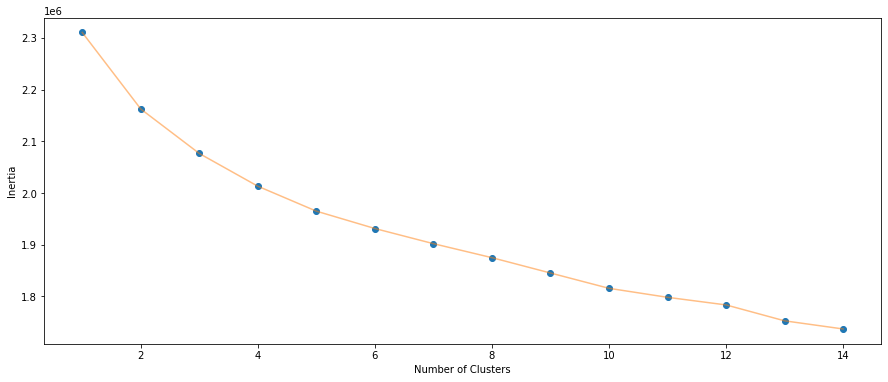

In [117]:
import numpy as np

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### 1) 13 clusters

In [118]:
# Final model with k=13
kmeans_13 = KMeans(n_clusters = 13 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full')
kmeans_13.fit(df_final_no_cat_scaled)

KMeans(algorithm='full', n_clusters=13, random_state=111)

In [119]:
#kmeans_13.labels_

In [120]:
df_final_no_cat['Cluster_13'] = kmeans_13.labels_
df_final_no_cat

,gender,QUOTAGERANGE,KIDS02,HHCMP10,AgexGender_Recode,KIDS_IN_HH_1,KIDS_IN_HH_2,MOMENT_LOOP_1_FREQ_cat,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,...,MOMENT_LOOP_1_Q25_7,MOMENT_LOOP_1_Q25_9,MOMENT_LOOP_1_Q35_1,MOMENT_LOOP_1_Q35_2,MOMENT_LOOP_1_Q35_3,MOMENT_LOOP_1_P2P_1,MOMENT_LOOP_1_P2P_2,MOMENT_LOOP_1_P2P_4,MOMENT_LOOP_1_Q36_1,Cluster_13
0,2,3,2,4,8,1,0,3,4,1,...,0,0,1,0,0,1,0,0,1,2
1,2,3,2,4,8,1,0,3,4,2,...,0,0,1,0,0,1,0,0,1,8
2,2,3,2,4,8,1,0,4,3,1,...,0,0,1,0,0,1,0,0,1,2
3,2,5,0,3,10,0,1,3,3,2,...,0,0,1,0,0,1,0,0,1,11
4,2,5,0,3,10,0,1,3,3,2,...,0,1,1,0,0,1,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1,3,2,4,3,1,0,1,4,1,...,0,1,1,0,0,1,0,0,0,6
39157,1,3,2,4,3,1,0,2,4,1,...,0,0,1,0,0,1,0,0,1,1
39158,1,3,2,4,3,1,0,1,1,1,...,0,0,1,0,0,1,0,0,1,7
39159,2,3,0,1,8,0,1,4,1,2,...,0,0,1,0,0,1,0,0,1,10


In [121]:
df_final_no_cat['Cluster_13'].value_counts()

4     5500
0     4263
10    4019
5     3628
2     3414
3     3333
9     3065
7     2902
12    2695
11    1888
1     1604
8     1471
6     1379
Name: Cluster_13, dtype: int64

### 2) 12 clusters

In [122]:
# Final model with k=12
kmeans_12 = KMeans(n_clusters = 12 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full')
kmeans_12.fit(df_final_no_cat_scaled)

KMeans(algorithm='full', n_clusters=12, random_state=111)

In [123]:
df_final_no_cat['Cluster_12'] = kmeans_12.labels_
df_final_no_cat

,gender,QUOTAGERANGE,KIDS02,HHCMP10,AgexGender_Recode,KIDS_IN_HH_1,KIDS_IN_HH_2,MOMENT_LOOP_1_FREQ_cat,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,...,MOMENT_LOOP_1_Q25_9,MOMENT_LOOP_1_Q35_1,MOMENT_LOOP_1_Q35_2,MOMENT_LOOP_1_Q35_3,MOMENT_LOOP_1_P2P_1,MOMENT_LOOP_1_P2P_2,MOMENT_LOOP_1_P2P_4,MOMENT_LOOP_1_Q36_1,Cluster_13,Cluster_12
0,2,3,2,4,8,1,0,3,4,1,...,0,1,0,0,1,0,0,1,2,3
1,2,3,2,4,8,1,0,3,4,2,...,0,1,0,0,1,0,0,1,8,3
2,2,3,2,4,8,1,0,4,3,1,...,0,1,0,0,1,0,0,1,2,3
3,2,5,0,3,10,0,1,3,3,2,...,0,1,0,0,1,0,0,1,11,10
4,2,5,0,3,10,0,1,3,3,2,...,1,1,0,0,1,0,0,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1,3,2,4,3,1,0,1,4,1,...,1,1,0,0,1,0,0,0,6,11
39157,1,3,2,4,3,1,0,2,4,1,...,0,1,0,0,1,0,0,1,1,11
39158,1,3,2,4,3,1,0,1,1,1,...,0,1,0,0,1,0,0,1,7,7
39159,2,3,0,1,8,0,1,4,1,2,...,0,1,0,0,1,0,0,1,10,5


In [124]:
df_final_no_cat['Cluster_12'].value_counts()

1     5431
4     4352
5     4221
3     4128
6     3680
2     3504
8     3368
11    2264
7     2108
10    2106
9     2095
0     1904
Name: Cluster_12, dtype: int64

### 3) 11 clusters

In [125]:
# Final model with k=11
kmeans_11 = KMeans(n_clusters = 11 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full')
kmeans_11.fit(df_final_no_cat_scaled)

KMeans(algorithm='full', n_clusters=11, random_state=111)

In [126]:
df_final_no_cat['Cluster_11'] = kmeans_11.labels_
df_final_no_cat

,gender,QUOTAGERANGE,KIDS02,HHCMP10,AgexGender_Recode,KIDS_IN_HH_1,KIDS_IN_HH_2,MOMENT_LOOP_1_FREQ_cat,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,...,MOMENT_LOOP_1_Q35_1,MOMENT_LOOP_1_Q35_2,MOMENT_LOOP_1_Q35_3,MOMENT_LOOP_1_P2P_1,MOMENT_LOOP_1_P2P_2,MOMENT_LOOP_1_P2P_4,MOMENT_LOOP_1_Q36_1,Cluster_13,Cluster_12,Cluster_11
0,2,3,2,4,8,1,0,3,4,1,...,1,0,0,1,0,0,1,2,3,3
1,2,3,2,4,8,1,0,3,4,2,...,1,0,0,1,0,0,1,8,3,8
2,2,3,2,4,8,1,0,4,3,1,...,1,0,0,1,0,0,1,2,3,3
3,2,5,0,3,10,0,1,3,3,2,...,1,0,0,1,0,0,1,11,10,9
4,2,5,0,3,10,0,1,3,3,2,...,1,0,0,1,0,0,1,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1,3,2,4,3,1,0,1,4,1,...,1,0,0,1,0,0,0,6,11,10
39157,1,3,2,4,3,1,0,2,4,1,...,1,0,0,1,0,0,1,1,11,3
39158,1,3,2,4,3,1,0,1,1,1,...,1,0,0,1,0,0,1,7,7,10
39159,2,3,0,1,8,0,1,4,1,2,...,1,0,0,1,0,0,1,10,5,2


In [127]:
df_final_no_cat['Cluster_11'].value_counts()

2     6866
3     5915
0     5159
5     4230
7     3628
6     3370
10    2351
4     2317
9     2017
1     1798
8     1510
Name: Cluster_11, dtype: int64

### 4) 10 clusters

In [128]:
# Final model with k=10
kmeans_10 = KMeans(n_clusters = 10 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full')
kmeans_10.fit(df_final_no_cat_scaled)

KMeans(algorithm='full', n_clusters=10, random_state=111)

In [129]:
df_final_no_cat['Cluster_10'] = kmeans_10.labels_
df_final_no_cat

,gender,QUOTAGERANGE,KIDS02,HHCMP10,AgexGender_Recode,KIDS_IN_HH_1,KIDS_IN_HH_2,MOMENT_LOOP_1_FREQ_cat,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,...,MOMENT_LOOP_1_Q35_2,MOMENT_LOOP_1_Q35_3,MOMENT_LOOP_1_P2P_1,MOMENT_LOOP_1_P2P_2,MOMENT_LOOP_1_P2P_4,MOMENT_LOOP_1_Q36_1,Cluster_13,Cluster_12,Cluster_11,Cluster_10
0,2,3,2,4,8,1,0,3,4,1,...,0,0,1,0,0,1,2,3,3,3
1,2,3,2,4,8,1,0,3,4,2,...,0,0,1,0,0,1,8,3,8,3
2,2,3,2,4,8,1,0,4,3,1,...,0,0,1,0,0,1,2,3,3,3
3,2,5,0,3,10,0,1,3,3,2,...,0,0,1,0,0,1,11,10,9,4
4,2,5,0,3,10,0,1,3,3,2,...,0,0,1,0,0,1,6,4,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1,3,2,4,3,1,0,1,4,1,...,0,0,1,0,0,0,6,11,10,7
39157,1,3,2,4,3,1,0,2,4,1,...,0,0,1,0,0,1,1,11,3,3
39158,1,3,2,4,3,1,0,1,1,1,...,0,0,1,0,0,1,7,7,10,7
39159,2,3,0,1,8,0,1,4,1,2,...,0,0,1,0,0,1,10,5,2,5


In [130]:
df_final_no_cat['Cluster_10'].value_counts()

9    6359
3    5833
1    5445
5    4347
6    3716
2    3580
8    3442
7    2261
4    2213
0    1965
Name: Cluster_10, dtype: int64

In [142]:
df_final_no_cat.groupby(['Cluster_10']).agg({i:'value_counts' for i in df_final_no_cat.columns})

gender  QUOTAGERANGE  KIDS02  HHCMP10  AgexGender_Recode  \
Cluster_10                                                                  
0          1.0   1070.0         253.0   398.0    468.0              123.0   
           2.0    895.0         466.0   249.0    577.0              246.0   
1          2.0   2850.0         853.0    97.0   2395.0              398.0   
           1.0   2595.0         464.0   238.0   1754.0              175.0   
2          1.0   2277.0         883.0  1165.0    276.0              551.0   
...                 ...           ...     ...      ...                ...   
7          11.0     NaN           NaN     NaN      NaN                NaN   
0          11.0     NaN           NaN     NaN      NaN                NaN   
5          11.0     NaN           NaN     NaN      NaN                NaN   
8          11.0     NaN           NaN     NaN      NaN                NaN   
9          11.0     NaN           NaN     NaN      NaN                NaN   

                 KIDS_IN_HH_1  KIDS_IN_HH_2  MOMENT_LOOP_1_FREQ_cat  \
Cluster_10                                                            
0          1.0          707.0        1258.0                    64.0   
           2.0            NaN           NaN                   189.0   
1          2.0            NaN           NaN                   207.0   
           1.0          343.0        5102.0                    60.0   
2          1.0         2364.0        1216.0                   240.0   
...                       ...           ...                     ...   
7          11.0           NaN           NaN                     NaN   
0          11.0           NaN           NaN                     NaN   
5          11.0           NaN           NaN                     NaN   
8          11.0           NaN           NaN                     NaN   
9          11.0           NaN           NaN                     NaN   

                 MOMENT_LOOP_1_Q27  MOMENT_LOOP_1_Q30  ...  \
Cluster_10                                             ...   
0          1.0              1041.0             1480.0  ...   
           2.0               521.0              485.0  ...   
1          2.0              2200.0             1126.0  ...   
           1.0              2410.0             4319.0  ...   
2          1.0               394.0             2510.0  ...   
...                            ...                ...  ...   
7          11.0                NaN                NaN  ...   
0          11.0                NaN                NaN  ...   
5          11.0                NaN                NaN  ...   
8          11.0                NaN                NaN  ...   
9          11.0                NaN                NaN  ...   

                 MOMENT_LOOP_1_Q35_2  MOMENT_LOOP_1_Q35_3  \
Cluster_10                                                  
0          1.0                 220.0                627.0   
           2.0                   NaN                  NaN   
1          2.0                   NaN                  NaN   
           1.0                 367.0               5078.0   
2          1.0                3301.0                186.0   
...                              ...                  ...   
7          11.0                  NaN                  NaN   
0          11.0                  NaN                  NaN   
5          11.0                  NaN                  NaN   
8          11.0                  NaN                  NaN   
9          11.0                  NaN                  NaN   

                 MOMENT_LOOP_1_P2P_1  MOMENT_LOOP_1_P2P_2  \
Cluster_10                                                  
0          1.0                 949.0                328.0   
           2.0                   NaN                  NaN   
1          2.0                   NaN                  NaN   
           1.0                   NaN                  NaN   
2          1.0                  50.0               2876.0   
...                              ...                  ...   
7 

In [138]:
df_final_no_cat.to_excel('cluster_11.01.xlsx')